<a href="https://colab.research.google.com/github/tylerscott3/CS290/blob/main/PortugalBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [3]:
import pandas as pd
import math

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [6]:
df= pd.concat([X,y], axis=1)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


In [35]:
df.nunique()

,0
age,77
job,11
marital,3
education,3
default,2
balance,7168
housing,2
loan,2
contact,2
day_of_week,31


In [7]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [8]:
features = df.columns[ df.columns != "y" ]
features

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [9]:
target = "y"
attribute = "marital"

In [10]:
vals = df[ attribute].unique()
vals

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
props = df[ df[attribute] == vals[1] ][target].value_counts( normalize=True )
props

,proportion
y,
no,0.850508
yes,0.149492


In [12]:
entropy = 0
for p in props.array:
  entropy = entropy - p*math.log2(p)
entropy

0.6085670475765929

In [13]:
entropy = 0
for i in range(len(props)):
  entropy = entropy - props.iloc[i]*math.log2( props.iloc[i] )
entropy

0.6085670475765929

In [14]:
entropy = 0
overall = len( df )
for val in vals:
  subset_size = len(df[ df[attribute] == val ])
  weight = subset_size / overall
  props = df[ df[attribute] == val ][target].value_counts( normalize=True )
  for p in props.array:
    entropy =  entropy - weight*(p*math.log2(p))

entropy

0.5175998043005658

GET FEATURE W LOwest entropy, if object only need to return name, if numerical need number and name

In [15]:
def attribute_with_lowest_entropy(df, target_var):

    sample_size = len(df)
    low_entropy = float('inf')
    best_attribute = None

    for attribute in df.drop(columns=[target_var]).columns:
        entropy = 0
        vals = df[attribute].unique()

        for val in vals:
            subset = df[df[attribute] == val]
            subset_size = len(subset)
            weight = subset_size / sample_size
            props = subset[target_var].value_counts(normalize=True)

            for p in props:
                entropy -= weight * (p * math.log2(p)) if p != 0 else 0

        if entropy < low_entropy:
            low_entropy = entropy
            best_attribute = attribute

    return best_attribute, low_entropy


In [16]:
target_var = "y"

best_attribute, best_entropy = attribute_with_lowest_entropy(df, target_var)

print(f"Attribute with the lowest entropy: {best_attribute}")
print(f"Lowest entropy: {best_entropy:.4f}")


Attribute with the lowest entropy: poutcome
Lowest entropy: 0.1170


#**Second Part of HW (Decision Tree)**






In [36]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [21]:
train_set.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [22]:
train_set = train_set[["marital", "job", "age", "poutcome", "balance", "y"]]

In [23]:
test_set = test_set[["marital", "job", "age", "poutcome", "balance", "y"]]

In [24]:
X_train = train_set[["marital", "job", "age", "poutcome", "balance"]]
y_train = train_set["y"]

In [25]:
X_test = train_set[["marital", "job", "age", "poutcome", "balance"]]
y_test = train_set["y"]

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

FILTER COLUMNS TO SEE IF FLOAT/INT ARE ACTUALLY THOSE

In [28]:
num_attributes = X_train.select_dtypes( include = ['int64','float64']).columns
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [29]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [30]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])

In [31]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.89189936, 0.88941111, 0.89272878, 0.89395825, 0.89064012])

In [32]:
pipeline.fit(X_train, y_train)
predictions = pipeline.predict( X_test )

In [33]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( y_test, predictions )
cm

array([[31462,   432],
       [ 3483,   791]])

[Text(0.5, 0.875, 'x[19] <= 0.5\ngini = 0.208\nsamples = 36168\nvalue = [31894, 4274]'),
 Text(0.25, 0.625, 'x[0] <= 1.836\ngini = 0.179\nsamples = 34944\nvalue = [31461, 3483]'),
 Text(0.125, 0.375, 'x[13] <= 0.5\ngini = 0.169\nsamples = 34144\nvalue = [30957, 3187]'),
 Text(0.0625, 0.125, 'gini = 0.164\nsamples = 33470\nvalue = [30450, 3020]'),
 Text(0.1875, 0.125, 'gini = 0.373\nsamples = 674\nvalue = [507, 167]'),
 Text(0.375, 0.375, 'x[1] <= -0.389\ngini = 0.466\nsamples = 800\nvalue = [504, 296]'),
 Text(0.3125, 0.125, 'gini = 0.384\nsamples = 135\nvalue = [100, 35]'),
 Text(0.4375, 0.125, 'gini = 0.477\nsamples = 665\nvalue = [404, 261]'),
 Text(0.75, 0.625, 'x[0] <= -1.645\ngini = 0.457\nsamples = 1224\nvalue = [433, 791]'),
 Text(0.625, 0.375, 'x[15] <= 0.5\ngini = 0.202\nsamples = 35\nvalue = [4, 31]'),
 Text(0.5625, 0.125, 'gini = 0.161\nsamples = 34\nvalue = [3, 31]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'x[0] <= 1.648\ngini 

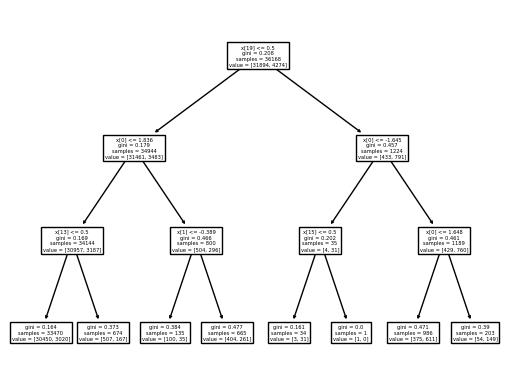

In [34]:

plot_tree( pipeline.named_steps['clf'])

FIND METRICS LIKE RECALL AND PRECISION